<a href="https://colab.research.google.com/github/asepmuhidin/research/blob/master/clustering_timbunan_sampah_sep22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
drive.mount('/mnt')

Mounted at /mnt


In [ ]:
!ls /mnt/MyDrive/datascience/dataset/

 dataset-idsa-master	       penduduk_luas_area.xlsx
 dataset-idsa.zip	       pre_so_dataset.xlsx
 diabetes.csv		       pre_so.xlsx
 diabetes_kaggle.csv	       store
 hasil_produksi_2020_up.xlsx  'Timbangan Sept 22.xlsx'
 intents.json		       WhatsAppDosenGasal2022_2023.txt


In [ ]:
path='/mnt/MyDrive/datascience/'
dataset_path=path+'dataset/'

In [ ]:
df=pd.read_excel(dataset_path+'Timbangan Sept 22.xlsx')

In [ ]:
df.head()

,NO,TGL MASUK,WAKTU MASUK,TGL KELUAR,WAKTU KELUAR,NO PLAT,NO PINTU,NO STRUK,NO STRUK 2,TIPE,KODE,JUMLAH RODA,LOKASI KERJA,PENUGASAN,COMPANY,PD PASAR,BERAT MASUK,BERAT KELUAR,NETT,TON
0,7,2022-09-01,00:08:24,2022-09-01,00:39:30,B 9643 UDG,SFG 06,5981281.0,9010007.0,Armroll Kecil,AK,6R,B2B,PENGELOLAAN KAWASAN MANDIRI,PT. SATRIA FAJAR GANTARA,NaN,5860.0,3960.0,1900.0,1.90
1,9,2022-09-01,00:04:39,2022-09-01,00:47:28,B 9196 PJA,0678 U,5981266.0,9010009.0,Compactor Kecil,CK,6R,CILINCING,JAKARTA UTARA,JAKARTA UTARA,NaN,8080.0,6280.0,1800.0,1.80
2,34,2022-09-01,00:03:06,2022-09-01,01:12:16,B 9213 TOR,0315 P,5981265.0,9010034.0,Tipper Besar,TB,6R,KEMAYORAN,JAKARTA PUSAT,JAKARTA PUSAT,NaN,15480.0,8960.0,6520.0,6.52
3,38,2022-09-01,00:07:58,2022-09-01,01:19:08,B 9285 TOQ,1153 T,5981279.0,9010038.0,Tipper Besar,TB,6R,PASAR REBO,JAKARTA TIMUR,JAKARTA TIMUR,NaN,15740.0,8000.0,7740.0,7.74
4,39,2022-09-01,00:07:11,2022-09-01,01:19:44,B 9692 TOQ,0857 S,5981276.0,9010039.0,Tipper Besar,TB,6R,KEBAYORAN BARU,JAKARTA SELATAN,JAKARTA SELATAN,NaN,17520.0,8860.0,8660.0,8.66


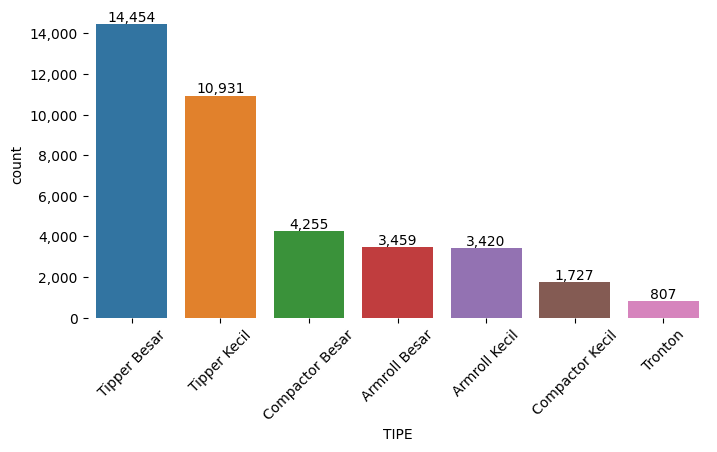

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set(frame_on=False)
sns.countplot(x="TIPE", data=df,order=df['TIPE'].value_counts().index,ax=ax)
ax.tick_params(axis='x', labelrotation=45)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:0,.0f}')

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in  plt.gca().get_yticks()])
plt.show();

In [ ]:
#kategori [NO PINTU,TIPE,KODE,JUMLAH RODA]
cates=['TIPE','KODE','JUMLAH RODA']

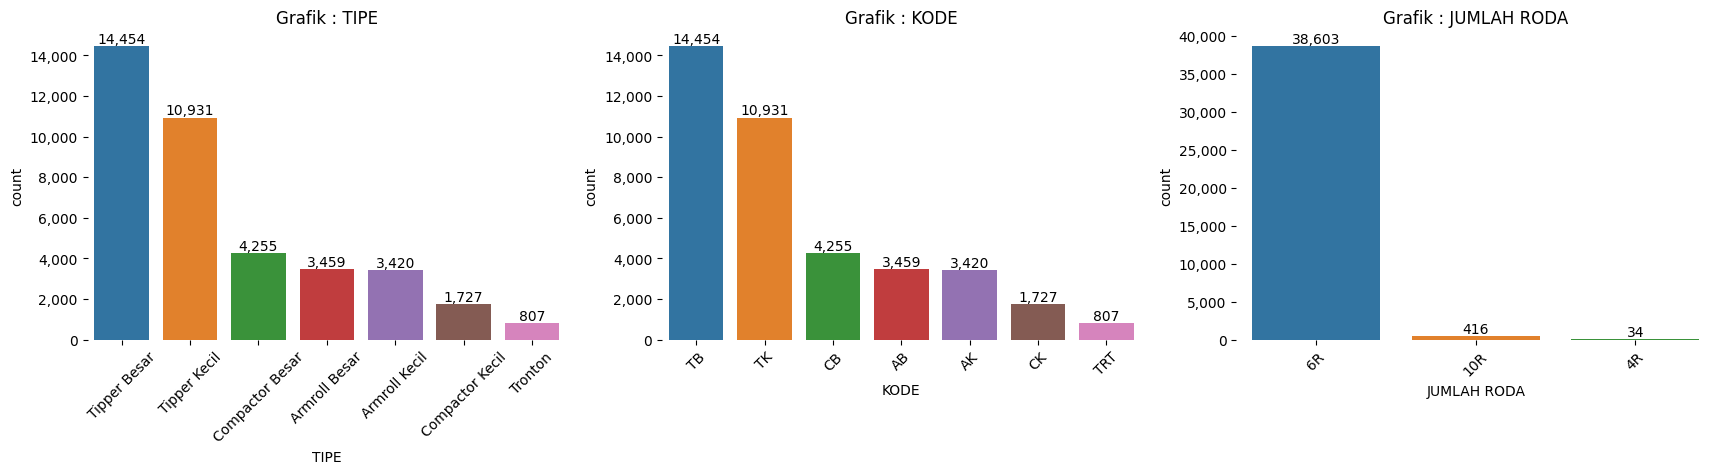

In [ ]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(1,len(cates),figsize=(21, 4))
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

for x,cate in zip(ax,cates):
  x.set(frame_on=False)
  x.set_title("Grafik : " +cate)
  sns.countplot(x=cate, data=df,order=df[cate].value_counts().index,ax=x)
  x.tick_params(axis='x', labelrotation=45)
  x.bar_label(x.containers[0], label_type='edge', fmt=lambda x: f'{x:0,.0f}')
  x.yaxis.set_major_formatter(tick)

In [ ]:
grp=df.groupby(['TIPE'])
summary=grp.agg(
    Total=('TON','sum'),
    Rata2=('TON','mean'),
    Min=('TON','min'),
    Max=('TON','max')
).sort_values('Total', ascending=False).reset_index()

In [ ]:
summary

,TIPE,Total,Rata2,Min,Max
0,Tipper Besar,122059.16,8.444663,-16.18,20.84
1,Tipper Kecil,36110.58,3.303502,-2.56,16.60
2,Compactor Besar,26699.22,6.274787,1.32,18.22
3,Armroll Besar,17042.32,4.926950,0.02,18.92
4,Tronton,11098.16,13.752367,2.90,25.32
5,Armroll Kecil,6201.08,1.813181,0.08,6.62
6,Compactor Kecil,5539.38,3.207516,0.26,13.06


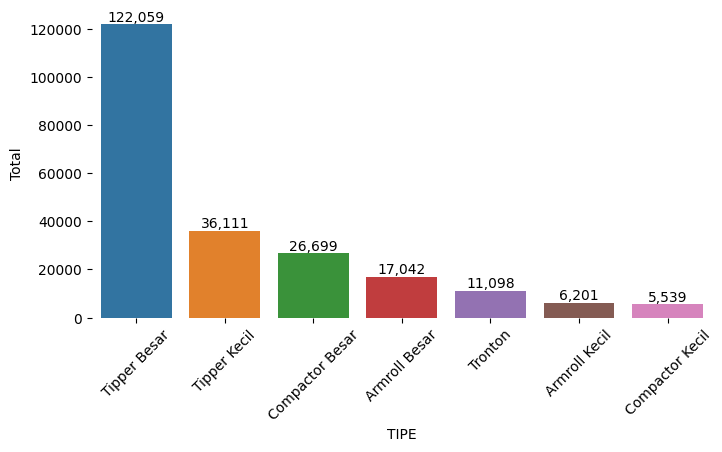

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set(frame_on=False)
sns.barplot(x="TIPE", y="Total",data=summary , ax=ax )
ax.tick_params(axis='x', labelrotation=45)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:0,.0f}')
plt.show();

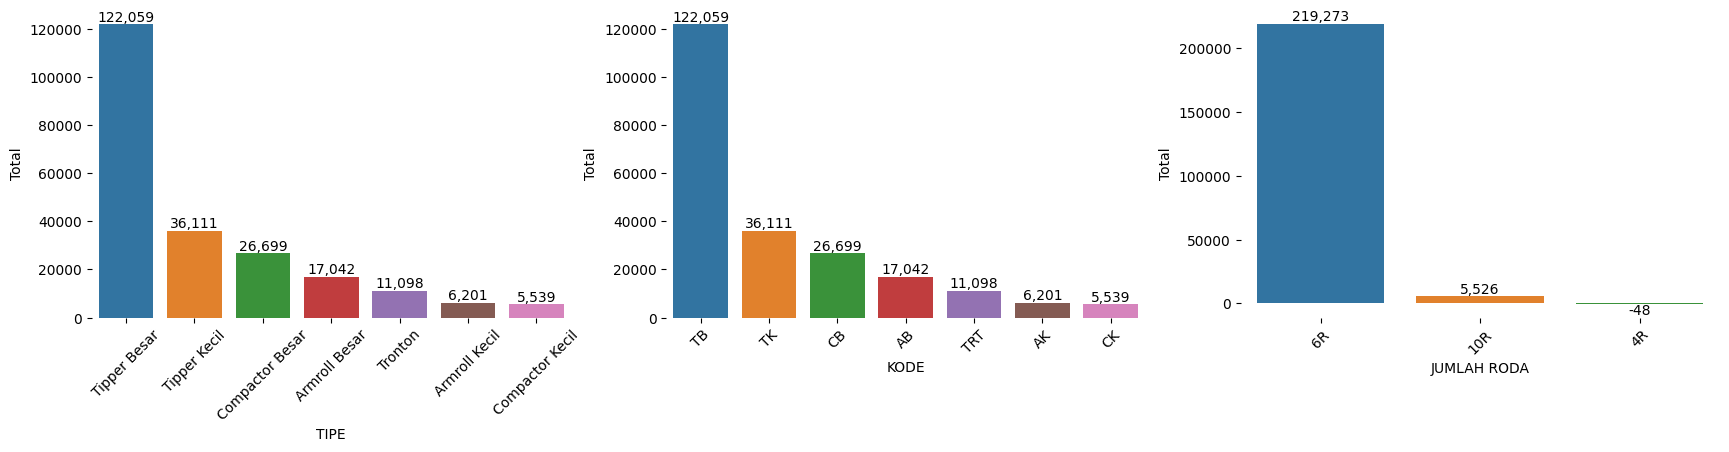

In [ ]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(1,len(cates),figsize=(21, 4))
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

for x,cate in zip(ax,cates):
  grp=df.groupby([cate])
  summary=grp.agg(
    Total=('TON','sum'),
    Rata2=('TON','mean'),
    Min=('TON','min'),
    Max=('TON','max')
  ).sort_values('Total', ascending=False).reset_index()

  x.set(frame_on=False)
  sns.barplot(x=cate, y="Total",data=summary , ax=x )
  x.tick_params(axis='x', labelrotation=45)
  x.bar_label(x.containers[0], label_type='edge', fmt=lambda x: f'{x:0,.0f}');

In [ ]:
nums=[
    {
        'field':'BERAT MASUK',
        'color':'b'
    },
    {
        'field':'BERAT KELUAR',
        'color':'r'
    },
    {
        'field':'NETT',
        'color':'g'
    }
]

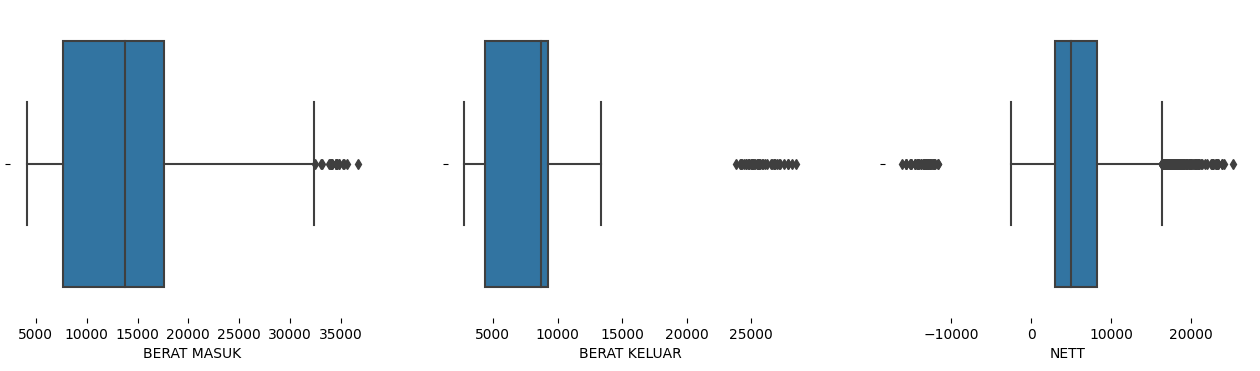

In [ ]:
numOfcols=[x['field'] for x in nums]
fig, ax = plt.subplots(1,3, figsize=(16, 4))

for x,cate in zip(ax,numOfcols):
  x.set(frame_on=False)
  sns.boxplot(x=df[cate], ax=x)


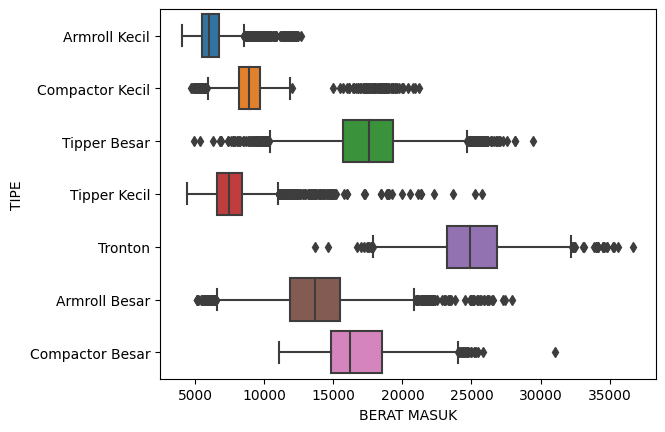

In [ ]:
sns.boxplot(data=df, x='BERAT MASUK',y='TIPE' );

In [ ]:
df[numOfcols].describe()

,BERAT MASUK,BERAT KELUAR,NETT
count,39053.000000,39053.000000,39053.000000
mean,13126.943385,7371.946329,5754.997055
std,5520.555305,2650.963012,3534.459565
min,4080.000000,2780.000000,-16180.000000
25%,7700.000000,4360.000000,2940.000000
50%,13800.000000,8700.000000,5000.000000
75%,17620.000000,9240.000000,8300.000000
max,36720.000000,28440.000000,25320.000000


In [ ]:
fitur=['TON']
X=df[fitur]
X.head()

,TON
0,1.90
1,1.80
2,6.52
3,7.74
4,8.66


In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_scaler=scaler.fit_transform(X)
X_scaler

array([[-8.45001811e-03],
       [-8.53795029e-03],
       [-4.38755142e-03],
       ...,
       [-2.89270437e-03],
       [-6.79689314e-03],
       [ 1.97617365e+02]])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#Elbow and silhoutte analysis
inertia=[]
silhoutte=[]
for k in range(2,9):
  kmeans=KMeans(n_clusters=k)
  member=kmeans.fit_predict(X_scaler)
  silhoutte_score=silhouette_score(X_scaler,member)

  inertia.append(kmeans.inertia_)
  silhoutte.append(silhoutte_score)

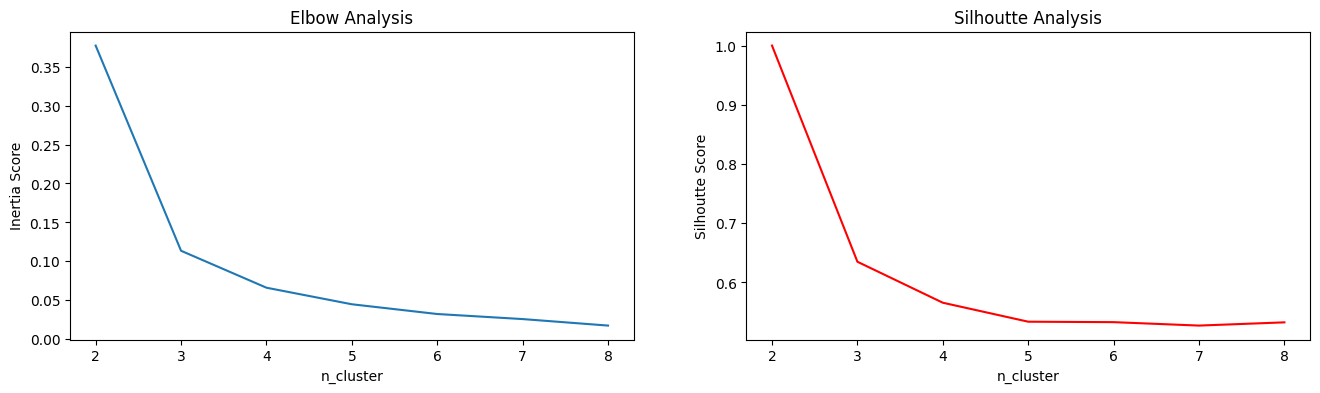

In [ ]:
fig,(c1,c2) = plt.subplots(1, 2, figsize=(16,4))
c1.set_title('Elbow Analysis')
c1.set_ylabel('Inertia Score')
c1.set_xlabel('n_cluster')
c1.plot(range(2,9),inertia)

c2.set_title('Silhoutte Analysis')
c2.set_ylabel('Silhoutte Score')
c2.set_xlabel('n_cluster')
c2.plot(range(2,9),silhoutte,'r-')


In [ ]:
#Menggunakan n_cluster hasil elbow analysis yaitu n_cluster=3
#k-modes untuk semua data kategori dan k-mean untuk semua data numerik
#k-prototype gabungan antara k-modes dan k-means
k=3

model=KMeans(n_clusters=k)
members=model.fit_predict(X_scaler)

In [ ]:
fitur=fitur+['LOKASI KERJA','PENUGASAN','COMPANY', 'PD PASAR']
data=df[fitur].copy()
data.head()

,TON,LOKASI KERJA,PENUGASAN,COMPANY,PD PASAR
0,1.90,B2B,PENGELOLAAN KAWASAN MANDIRI,PT. SATRIA FAJAR GANTARA,NaN
1,1.80,CILINCING,JAKARTA UTARA,JAKARTA UTARA,NaN
2,6.52,KEMAYORAN,JAKARTA PUSAT,JAKARTA PUSAT,NaN
3,7.74,PASAR REBO,JAKARTA TIMUR,JAKARTA TIMUR,NaN
4,8.66,KEBAYORAN BARU,JAKARTA SELATAN,JAKARTA SELATAN,NaN


In [ ]:
data['member']=members
data.head()

,TON,LOKASI KERJA,PENUGASAN,COMPANY,PD PASAR,member
0,1.90,B2B,PENGELOLAAN KAWASAN MANDIRI,PT. SATRIA FAJAR GANTARA,NaN,2
1,1.80,CILINCING,JAKARTA UTARA,JAKARTA UTARA,NaN,2
2,6.52,KEMAYORAN,JAKARTA PUSAT,JAKARTA PUSAT,NaN,2
3,7.74,PASAR REBO,JAKARTA TIMUR,JAKARTA TIMUR,NaN,0
4,8.66,KEBAYORAN BARU,JAKARTA SELATAN,JAKARTA SELATAN,NaN,0


In [ ]:
num=model.cluster_centers_
num

array([[-1.59457794e-03],
       [ 1.97617365e+02],
       [-7.00618579e-03]])

In [ ]:
df_num=pd.DataFrame(num,columns=data.columns[:1])
df_num.head()

,TON
0,-0.001595
1,197.617365
2,-0.007006


In [ ]:
#analisa
print(f'Rata-rata Timbulan sampah     : {X_scaler[0].mean():,.2f}')

Rata-rata Timbulan sampah     : -0.01


In [ ]:
grouped=data.groupby('member').size()
grouped


member
0    14452
1        1
2    24601
dtype: int64

In [ ]:
data[data.member==0]

,TON,LOKASI KERJA,PENUGASAN,COMPANY,PD PASAR,member
3,7.74,PASAR REBO,JAKARTA TIMUR,JAKARTA TIMUR,NaN,0
4,8.66,KEBAYORAN BARU,JAKARTA SELATAN,JAKARTA SELATAN,NaN,0
5,7.64,PASAR MINGGU,JAKARTA SELATAN,JAKARTA SELATAN,NaN,0
8,9.46,PANCORAN,JAKARTA SELATAN,JAKARTA SELATAN,NaN,0
10,10.86,PKLB3,JAKARTA UTARA,JAKARTA UTARA,NaN,0
...,...,...,...,...,...,...
39041,7.92,GROGOL PETAMBURAN,JAKARTA BARAT,JAKARTA BARAT,NaN,0
39045,7.50,CAKUNG,JAKARTA TIMUR,JAKARTA TIMUR,NaN,0
39049,9.76,PENJARINGAN,JAKARTA UTARA,JAKARTA UTARA,NaN,0
39050,8.22,CILINCING,JAKARTA UTARA,JAKARTA UTARA,NaN,0


In [ ]:
data[data.member==1]

,TON,LOKASI KERJA,PENUGASAN,COMPANY,PD PASAR,member
39053,224749.9,NaN,NaN,NaN,NaN,1


In [ ]:
data[data.member==2]

,TON,LOKASI KERJA,PENUGASAN,COMPANY,PD PASAR,member
0,1.90,B2B,PENGELOLAAN KAWASAN MANDIRI,PT. SATRIA FAJAR GANTARA,NaN,2
1,1.80,CILINCING,JAKARTA UTARA,JAKARTA UTARA,NaN,2
2,6.52,KEMAYORAN,JAKARTA PUSAT,JAKARTA PUSAT,NaN,2
6,1.50,KELAPA GADING,JAKARTA UTARA,JAKARTA UTARA,NaN,2
7,0.42,TANJUNG PRIOK,JAKARTA UTARA,JAKARTA UTARA,NaN,2
...,...,...,...,...,...,...
39044,1.32,PASAR - KEBON JERUK,JAKARTA BARAT,PASAR - JAKARTA BARAT,NaN,2
39046,5.26,TANJUNG PRIOK,JAKARTA UTARA,JAKARTA UTARA,NaN,2
39047,2.34,GROGOL PETAMBURAN,JAKARTA BARAT,JAKARTA BARAT,NaN,2
39048,5.14,PULOGADUNG,JAKARTA TIMUR,JAKARTA TIMUR,NaN,2


In [ ]:
data.to_excel(path+'clustering3member.xlsx')

In [ ]:
df[df.COMPANY.isna()]

,NO,TGL MASUK,WAKTU MASUK,TGL KELUAR,WAKTU KELUAR,NO PLAT,NO PINTU,NO STRUK,NO STRUK 2,TIPE,KODE,JUMLAH RODA,LOKASI KERJA,PENUGASAN,COMPANY,PD PASAR,BERAT MASUK,BERAT KELUAR,NETT,TON
39053,Total,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224749.9


In [ ]:
df.drop(df[df.COMPANY.isna()].index, inplace=True)

In [ ]:
df[df.COMPANY.isna()]

,NO,TGL MASUK,WAKTU MASUK,TGL KELUAR,WAKTU KELUAR,NO PLAT,NO PINTU,NO STRUK,NO STRUK 2,TIPE,KODE,JUMLAH RODA,LOKASI KERJA,PENUGASAN,COMPANY,PD PASAR,BERAT MASUK,BERAT KELUAR,NETT,TON


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '2019-10-01'),
  Text(1, 0, '2019-11-01'),
  Text(2, 0, '2019-12-01'),
  Text(3, 0, '2020-01-01'),
  Text(4, 0, '2020-02-01'),
  Text(5, 0, '2020-03-01'),
  Text(6, 0, '2020-04-01'),
  Text(7, 0, '2020-05-01'),
  Text(8, 0, '2020-06-01')])

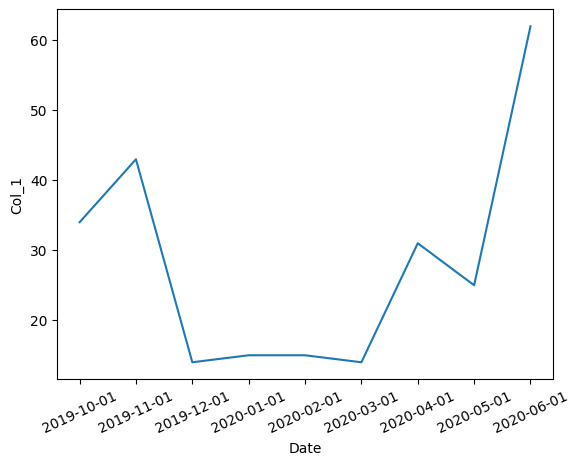

In [ ]:
df = pd.DataFrame({'Date': ['2019-10-01', '2019-11-01',
                            '2019-12-01','2020-01-01',
                            '2020-02-01', '2020-03-01',
                            '2020-04-01', '2020-05-01',
                            '2020-06-01'],

                   'Col_1': [34, 43, 14, 15, 15,
                             14, 31, 25, 62],

                   'Col_2': [52, 66, 78, 15, 15,
                             5, 25, 25, 86],

                   'Col_3': [13, 73, 82, 58, 52,
                             87, 26, 5, 56],
                   'Col_4': [44, 75, 26, 15, 15,
                             14, 54, 25, 24]})

# create the time series plot
sns.lineplot(x = "Date", y = "Col_1",
             data = df)

plt.xticks(rotation = 25)